## Setup

In [1]:
import torch
from torch import tensor
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

In general we're going to be faced with a dataset with an unknown and probably nonlinear relationship. But for now let's use a simple dataset with a known linear relationship:

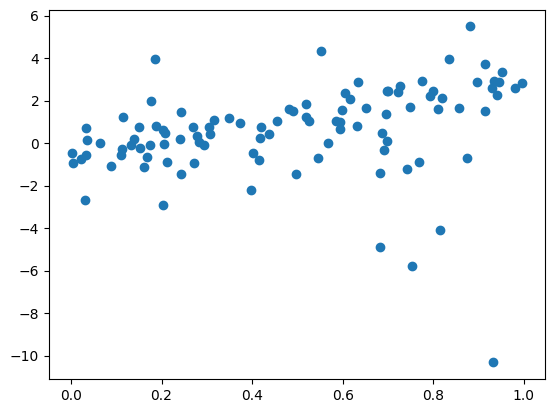

In [2]:
true_weights = 4.0
true_bias = -1.0

# Make the randomness consistent
torch.manual_seed(0)
# Use random x values
x = torch.rand(100)
# Generate random noise, same shape as *x*, that has some outliers.
noise = torch.distributions.studentT.StudentT(2.0).sample(x.shape)
# For a simpler variant, use  torch.randn_like(x).
#print(f"Noise mean: {noise.mean()}, noise variance {noise.var()}")
# Generate true y values 
y_true = true_weights * x + noise + true_bias
# Make a scatterplot. The semicolon at the end says to ignore the return value.
plt.scatter(x, y_true);

In [3]:
bias = 0.0

In [15]:
@widgets.interact(slope=(-5.0, 5.0))
def plot_linreg(slope):
    y_pred = slope * x + bias
    plt.scatter(x, y_true)
    plt.plot(x, y_pred, 'r')
    resid = y_true - y_pred
    mse = torch.mean((y_true-y_pred)**2).item()
    mae = torch.mean(torch.abs(y_true-y_pred)).item()
    print(f"MSE: {mse:.2f}, MAE: {mae:.2f}")

interactive(children=(FloatSlider(value=0.0, description='slope', max=5.0, min=-5.0), Output()), _dom_classes=…

- Slope that minimizes MSE: <CHECK FOR YOUR OWN CODE>
- Slope that minimizes MAE: <CHECK FOR YOUR OWN CODE>
- Description of the difference: <CHECK FOR YOUR OWN CODE>

### Gradient


In [17]:
def calculate_mse(slope, x, y_true, bias=0.0):
    y_pred = slope * x + bias
    mse = torch.mean((y_true - y_pred)**2).item()
    return mse

slope_values = [1.0, 1.5, 2.0]

for slope in slope_values:
    mse_value = calculate_mse(slope, x, y_true)
    print(f"For slope {slope}, the Mean Squared Error is: {mse_value:.2f}")

Slope: 1.0 MSE: 4.33
Slope: 1.5 MSE: 4.28
Slope: 2.0 MSE: 4.39


In [19]:
eps = 1e-3
x0_1 = 0.0
numerical_gradient_1 = (calculate_mse(x0_1 + eps, x, y_true) - calculate_mse(x0_1, x, y_true)) / eps
print(f"For x0 = {x0_1}, Numerical Gradient: {numerical_gradient_1:.2f}")

x0_2 = 1.40
numerical_gradient_2 = (calculate_mse(x0_2 + eps, x, y_true) - calculate_mse(x0_2, x, y_true)) / eps
print(f"For x0 = {x0_2}, Numerical Gradient: {numerical_gradient_2:.2f}")


Numerical Gradient (x0 = 0.0): -0.91
Numerical Gradient (x0 = 1.4): 0.00


### Gradient Descent

In [20]:
initial_slope_ascent = 0.0

initial_loss_ascent = calculate_mse(initial_slope_ascent, x, y_true)
print(f"Initial Slope: {initial_slope_ascent}, Initial Loss: {initial_loss_ascent:.2f}")

gradient_ascent = (calculate_mse(initial_slope_ascent + eps, x, y_true) - initial_loss_ascent) / eps
slope_ascent = initial_slope_ascent + 0.01 * gradient_ascent
print(f"Updated Slope (Gradient Ascent): {slope_ascent:.2f}")

updated_loss_ascent = calculate_mse(slope_ascent, x, y_true)
print(f"Updated Loss (Gradient Ascent): {updated_loss_ascent:.2f}")

Initial Slope: 0.0, Initial Loss: 4.91
Updated Slope (Gradient Ascent): -0.01
Updated Loss (Gradient Ascent): 4.92


In [22]:
initial_slope_descent = 0.0

initial_loss_descent = calculate_mse(initial_slope_descent, x, y_true)
print(f"Initial Slope: {initial_slope_descent}, Initial Loss: {initial_loss_descent:.2f}")

gradient_descent = (initial_loss_descent - calculate_mse(initial_slope_descent - eps, x, y_true)) / eps
slope_descent = initial_slope_descent - 0.01 * gradient_descent
print(f"Updated Slope (Gradient Descent): {slope_descent:.2f}")

updated_loss_descent = calculate_mse(slope_descent, x, y_true)
print(f"Updated Loss (Gradient Descent): {updated_loss_descent:.2f}")

Initial Slope: 0.0, Initial Loss: 4.91
Updated Slope (Gradient Descent): 0.01
Updated Loss (Gradient Descent): 4.90
